<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/Copy_of_SDA_ML_Week2_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
# Import what you feel is neccessary from scikit-learn


<center><H1>Adult Dataset Classification</H1></center>


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



In [325]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"].map({" <=50K" : "<=50K"  , ' >50K':'>50K'})
# y_train = y_train.map({'<=50K': 0, '>50K': 1})


# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"].map({" <=50K." : "<=50K"  , ' >50K.':'>50K'})
# y_test = y_test.map({'<=50K': 0, '>50K': 1})


### **Determine your baseline model accuracy**

In [195]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)


In [196]:

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0] # what value to predict? (classification = most common class)

baseline_model(n_predictions, baseline_value)


0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280    <=50K
Length: 16281, dtype: object

In [199]:
# score baseline model...
#https://stackoverflow.com/questions/46406720/labelencoder-typeerror-not-supported-between-instances-of-float-and-str
accuracy_score(y_test.astype(str), baseline_preds)

0.7637737239727289

### **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


In [203]:
corr = training.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


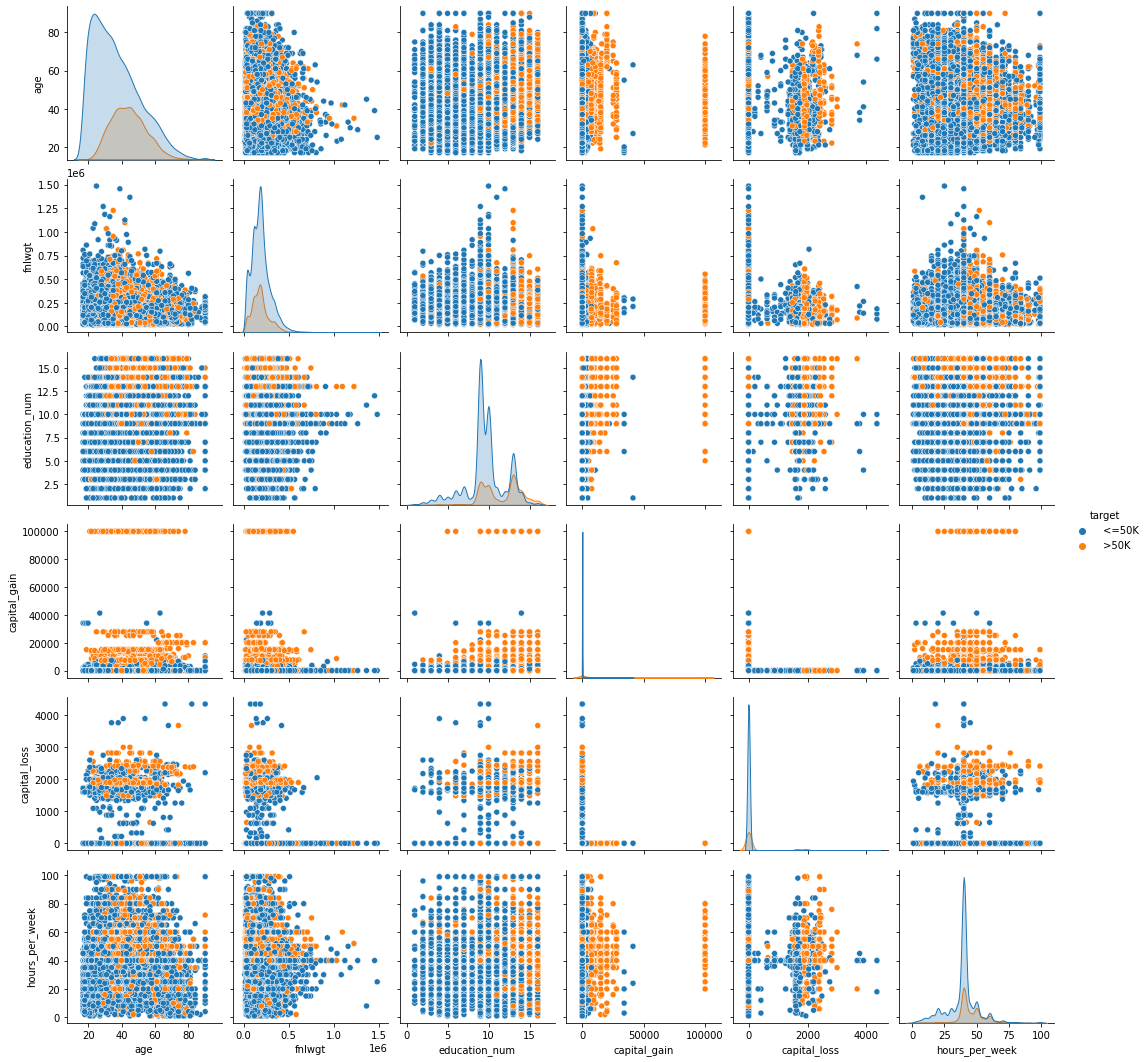

In [204]:
import seaborn as sns
sns.pairplot(training, hue='target');

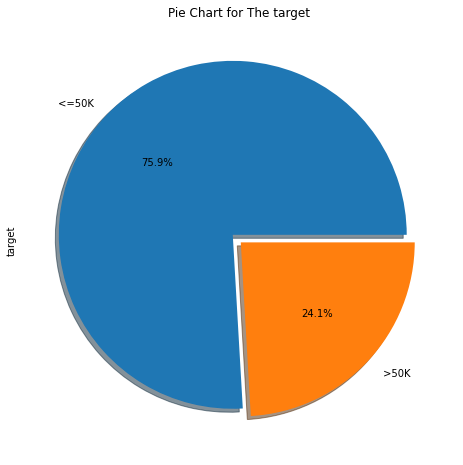

In [205]:
import matplotlib.pyplot as plt

training['target'].value_counts().plot.pie(explode=[0.04650, 0.01688], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The target')
plt.show()

### **Clean and Preprocess your Data** (Hint: One-Hot-Encode Categoricals)
Another hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [326]:
 y_train = y_train.map({'<=50K': 0, '>50K': 1})
 y_test = y_test.map({'<=50K': 0, '>50K': 1})

In [328]:
X_train = pd.DataFrame(X_train.drop(["native_country"],axis=1))
X_train =  pd.DataFrame(pd.get_dummies(X_train, prefix=['workclass', 'education', 'marital_status', 'ooccupation', 'relationship','sex']))
X_train


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [329]:
X_test = pd.DataFrame(X_test.drop(["native_country"],axis=1))
X_test =  pd.DataFrame(pd.get_dummies(X_test, prefix=['workclass', 'education', 'marital_status', 'ooccupation', 'relationship','sex']))
X_test

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,28,336951,12,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,44,160323,10,7688,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,18,103497,10,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
16277,64,321403,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
16278,38,374983,13,0,0,50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
16279,44,83891,13,5455,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### **Create a kNN model** 



In [330]:
knn = KNeighborsClassifier(n_neighbors=3)

In [333]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [342]:
pre = knn.predict(X_test)
pre

array([0, 0, 0, ..., 0, 0, 0])

### **Show us your confusion matrix and explain the results**

In [340]:
confusion_matrix(y_test, knn.predict(X_test))


array([[10948,  1487],
       [ 2407,  1439]])

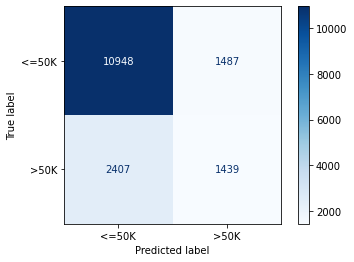

In [341]:
plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test, cmap='Blues',values_format='',
                      display_labels=['<=50K', '>50K'])

the model predict 10948 were <=50K (true) \
and 1439 were >50K (true) \
the model predict 1487 were <=50k (false) \
and 2407 were >50K (false)

### **Compare to Baseline model and explain the results**

In [344]:
accuracy_score(y_test, pre)

0.7608255021190344

In [348]:
0.7637737239727289 - 0.7608255021190344

0.002948221853694477

I should not use the knn model it is less accurate than the baseline model

### **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



### **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid